<a href="https://colab.research.google.com/github/rafaelbsouza/Portfolio/blob/master/Analise_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Rafael Souza](https://www.linkedin.com/in/rbssouza)*

---

# Coronavírus: Um Panoramo no Brasil e no Mundo

<center><img alt="Imagem: Corona Borealis Studio/Shutterstock.com" width="80%" src="https://socgastro.org.br/novo/wp-content/uploads/2020/06/covid_dados.jpg"></center>

>>> Imagem: Corona Borealis Studio/Shutterstock.com

A COVID-19 é uma doença causada pelo coronavírus **SARS-CoV-2**, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. De acordo com a Organização Mundial de Saúde (OMS), a maioria dos pacientes com COVID-19 (cerca de 80%) podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória e desses casos aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório).

Neste projeto, compararemos a situação atual do Coronavírus no Brasil e no Mundo.



## Obtenção dos Dados
Atualmente, um dos assuntos mais comentados no Brasil e no mundo é o **Coronavírus**. Diariamente somos bombardeados com uma avalanche de informações referente a situação da Covid-19. Os dados apresentados nem sempre possuem uma mesma fonte, sendo coletados dos mais diversos órgãos e instituições que realizam esses controles estatisticos. 

Neste projeto, analisaremos os dados disponibilizados e atualizados pela [**Our World in Data**](https://ourworldindata.org), que tem tem como foco principal atuar nas seguintes vertentes: *doenças, fome, alterações climáticas, guerra, desigualdade, etc*.

Os dados são atualizados diariamente e utilizaremos uma cópia com as informações desde o inicio desta pandemia até o dia **29/06/2020**

### Importando os dados

Antes de iniciar a nossa análise inicial dos dados, realizaremos a importação dos dados e dos pacotes que utilizaremos nesse projeto. 

In [ ]:
#importando os pacotes necessários
!pip install pywaffle -q
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

#importar o dataset para um dataframe
covid = pd.read_csv('https://raw.githubusercontent.com/rafaelbsouza/datasets/master/Covid19/owid-covid-data.csv')


## Análise Inicial dos Dados
Para essa análise inicial iremos: 
1.   Construir o dicionário dos dados
2.   Descobrir o tamanho do DataFrame
3.   Visualizar os 5 primeiros registros do nosso DataFrame
4.   Identificar a porcentagem de valores ausentes

###**Dicionário de Variáveis**

* **iso_code**                          	-	Código do País com 3 Letras
* **continent** 	-	Continente
* **location** - 	Localização Geográfica (País)

* **date**                    	-	  Data da Observação		
* **total_cases**              	-	  Total de casos confirmados de COVID-19		
* **new_cases**                    	-	  Novos casos de COVID-19		
* **total_deaths**       	-	Total de Mortes por COVID-19		
* **new_deaths**                    	-	  Novas Mortes de COVID-19
* **total_cases_per_million**             	- Total de casos confirmados por 1 milhão de habitantes
* **new_cases_per_million**                 -	Novos casos confirmados por 1 milhão de habitantes

* **total_deaths_per_million**                   	- Total de mortes por COVID-19 por milhão de habitantes
* **new_deaths_per_million**            	-	  Novas mortes por COVID-19 por milhão de habitantes 

* **total_tests**                	-	  Total de testes realziados 		
* **new_tests**              	-	  Novos testes realizados 		
* **new_tests_smoothed**                 	- Novos testes Realizados (Período 7 dias)		
* **total_tests_per_thousand**                   	-	  Total de testes realziados por mil habitantes		
* **new_tests_per_thousand**              	-	  Total de novos testes por mil habitantes 	
* **new_tests_smoothed_per_thousand**             	- Novos testes Realizados por mil habitantes(Período 7 dias)		
* **tests_units**                   	-	  Quantidades unitárias de testes por localidade (País)	
* **stringency_index**           	-	  indice de rigor (0 até 100 quanto maior o indice mais rigorosas foram as medidas)  	
* **population**                 	-	  População em 2020		
* **population_density**          	-	  Densidade populacional (Total de habitantes por quilometro quadrado)		
* **median_age**              	-	Idade média da população (Projeção Nações Unidas - 2020 )		
* **aged_65_older**               	-	Parcela da população igual ou maior que 65 anos
* **aged_70_older**                 	-	Parcela da população igual ou maior que 70 anos		
* **gdp_per_capita**                  	-	PIB - Produto Interno Bruto

* **extreme_poverty**                	-	Parcela da população vivendo em extrema pobreza		
* **cvd_death_rate**              	-	Taxa de mortalidade por doenças cardiovasculares em 2017		
* **diabetes_prevalence**                	-	Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017		
* **female_smokers**                 	-	Parcela feminina da população fumante		
* **handwashing_facilities**               	-	Parcela da população com instações de higiene pessoal básica (lavar as mãos)
* **hospital_beds_per_thousand**                 	-	Número de leitos de hospital por mil habitantes		
* **life_expectancy**                  	-	Expectativa de vida em 2019

### Tamanho do DataFrame

In [2]:
#ver o tamanho do nosso dataframe (total de linhas e colunas)
print ("Entradas:\t{}".format(covid.shape[0]))
print ("Colunas: \t{}".format(covid.shape[1]))

#verificar as 5 primeiras entradas (registros) do dataframe
print ("")
covid.head()

Entradas:	29171
Colunas: 	34



,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


### Valores Ausentes

Verificando as entradas acima, nota-se a existência de diversas colunas com valores **NaN** ou em **branco**, o que indica a presença de muitos registros nulos ou não preenchidos. 

Abaixo, observa-se a porcentagem desses valores nulos/sem preenchimento

In [3]:
# Verificar a % de valores ausentes no Dataframe
(covid.isnull().sum() / covid.shape[0] * 100).sort_values(ascending = False)

new_tests                          70.690069
new_tests_per_thousand             70.690069
total_tests_per_thousand           69.291420
total_tests                        69.291420
new_tests_smoothed_per_thousand    66.675808
new_tests_smoothed                 66.675808
tests_units                        64.293305
handwashing_facilities             59.123787
extreme_poverty                    40.351719
male_smokers                       28.764869
female_smokers                     27.921566
stringency_index                   19.539954
hospital_beds_per_thousand         17.651092
aged_65_older                      11.100065
gdp_per_capita                     10.860101
aged_70_older                      10.277330
median_age                          9.814542
cvd_death_rate                      9.735696
diabetes_prevalence                 6.760138
population_density                  4.408488
life_expectancy                     1.391793
new_deaths_per_million              1.285523
total_deat

###Limpeza e ajuste do DataFrame

Acima, identifica-se a existência de variáveis com até **70%** dos dados sem preenchimento. 



In [4]:
# verificar os tipos das nossas variáveis no dataset
covid.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Como trabalharemos com datas, iremos transformar a variável `date` no formato datetime. Atualmente a variavel está registrada como um conjunto de caracteres o que não permite a manipulação de forma apropriada.


In [5]:
# tranformando a varivel date para datetime
covid['date'] = pd.to_datetime(covid['date']).copy()

# verificando a data mais atual do nosso dataframe
covid.date.max()

Timestamp('2020-07-09 00:00:00')

Acima, nota-se que o conjunto de dados que estamos trabalhando foi atualizado até o dia **09/07/2020**. 

Todas as análises aqui apresentadas, serão realizadas a partir desta data. 

## Cenário Mundial

O novo Coronavírus, pegou todo o mundo de surpresa com a facilidade que se é transmitido esse vírus entre os humanos. 

Muitos países adoram diversos tipos de medidas para a conteção do vírus e a preservação da vida humana.

Em relação ao cenário Mundial, analisaremos: 

* Total de Casos confirmados 
* Total de Mortes confirmadas
* Os países com o maior número de infectados
* Os países com o maior número de mortes
* Os continentes mais afetados pelo Coranavírus



###Qual o total de Casos e Mortes confirmados no mundo?


In [6]:
#totalmundo = 
covid.query('date == "2020-07-08" & location == "World"')
totaismundo = covid.query('date == "2020-07-08" & location == "World"')

totaismundo = totaismundo[{"date", "location", "total_cases", "total_deaths"}]
#print ("O total de casos do mundo é de: {}".format(totalmundo));

totaismundo

,date,location,total_deaths,total_cases
29105,2020-07-08,World,543906.0,11802188.0


In [7]:
#Calcular a média do número de casos / número de mortes. 
casos = totaismundo['total_cases'].max()
mortes = totaismundo['total_deaths'].max()
taxa = mortes / casos * 100
taxa = (round(taxa,2))

print('O total de mortes por Covid-19 representa {}%'.format(taxa),'do total de casos registrados no Mundo ')

O total de mortes por Covid-19 representa 4.61% do total de casos registrados no Mundo 


Em **09/07/2020** o número total de infectados pelo vírus da **SARS-CoV-2** passava dos **11 milhões** de pessoas. Dentre estes, **4,61%** vieram a óbito.  




### Quais os países 15 países com maior número de infectados? 

In [8]:
top10casos = covid.query('date == "2020-07-08"')
top10casos = top10casos[{'location', 'total_cases'}].sort_values(by="total_cases", ascending=False)[1:17]
top10casos = top10casos.reset_index(drop=True)
top10casos = top10casos.shift()[1:]
top10casos = top10casos.rename(columns= {'location':'País', 'total_cases': 'Total de Casos'})
top10casos = round(top10casos,8)
top10casos

,Total de Casos,País
1,2996098.0,United States
2,1668589.0,Brazil
3,742417.0,India
4,694230.0,Russia
5,309278.0,Peru
6,301019.0,Chile
7,286349.0,United Kingdom
8,268008.0,Mexico
9,252513.0,Spain
10,245688.0,Iran


### Quais os 15 países com o maior número de mortes?

In [9]:
top10mortes = covid.query('date == "2020-07-08"')
top10mortes = top10mortes[{'location', 'total_deaths'}].sort_values(by="total_deaths", ascending=False)[1:17]
top10mortes = top10mortes.reset_index(drop=True)
top10mortes = top10mortes.shift()[1:]
top10mortes = top10mortes.rename(columns= {'location':'País', 'total_deaths': 'Total de Mortes'})
top10mortes

,País,Total de Mortes
1,United States,131480.0
2,Brazil,66741.0
3,United Kingdom,44391.0
4,Italy,34899.0
5,Mexico,32014.0
6,France,29933.0
7,Spain,28396.0
8,India,20642.0
9,Iran,11931.0
10,Peru,10952.0


Acima, destacam-se entre os países com o maior número de mortes a **França** e **Bélgica**. Mesmo não figurando entre os países com os maiores números de infectados, ainda assim estão entre os países com o maior número de mortes.

No gráfico abaixo, observa-se a comparação entre os dois países com o maior número de casos (Brasil e Estados Unidos) e a França e a Bélgica.

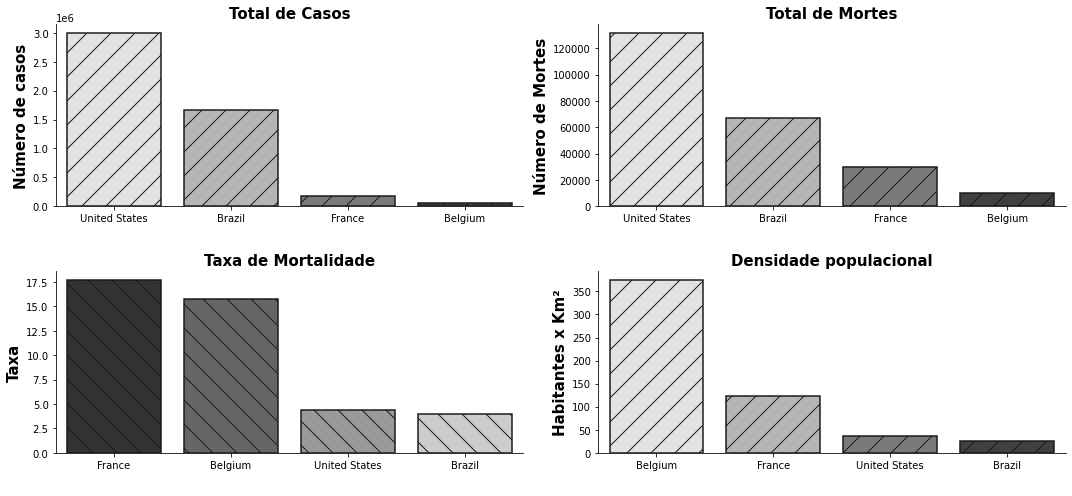

In [10]:
#Construção de um novo dataframe para comparação dos países citados acima
comp = covid.loc[(covid.date == '2020-07-08') & (covid.location.isin({"United States", "Brazil", "Belgium", "France"})), 
                 ['location', 'total_cases', 'total_deaths', 'aged_65_older' ,'aged_70_older', 'hospital_beds_per_thousand' ,'population_density'] ]

#criação de uma nova coluna no dataframe que é a porcentual de mortalidade pelo número de casos
comp['death_rate'] = comp['total_deaths'] / comp['total_cases'] * 100

#variáveis para plotagem
deaths = comp[{'location', 'total_deaths'}].sort_values(by="total_deaths", ascending=False)
cases = comp[{'location', 'total_cases'}].sort_values(by="total_cases", ascending=False)
rate = comp[{'location', 'death_rate'}].sort_values(by="death_rate", ascending=False)
density = comp[{'location', 'population_density'}].sort_values(by="population_density", ascending=False)

#plotando os Gráficos

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,7), squeeze=False, ) #Configuração da figura

#Gráfico 1
ax = sns.barplot(x="location", y="total_cases", data=cases,
                 edgecolor = "0.1",
                 linewidth =1.5,
                 palette="Greys",
                 hatch = "/", ax=ax1 )
ax.set_title ("Total de Casos", fontsize = 15, weight = 'bold')
ax.set_ylabel ("Número de casos", fontsize = 15, weight = 'bold')
ax.set_xlabel (" ",fontsize = 15, weight = 'bold' )

#Gráfico 2
ax= sns.barplot(x="location", y="total_deaths", data=deaths,
                 edgecolor = "0.1",
                 linewidth = 1.5,
                 palette="Greys",
                 hatch = "/", ax=ax2)
ax.set_title ("Total de Mortes", fontsize = 15, weight = 'bold')
ax.set_ylabel ("Número de Mortes", fontsize = 15, weight = 'bold')
ax.set_xlabel (" ",fontsize = 15, weight = 'bold' )

#Gráfico 3
ax= sns.barplot(x="location", y="death_rate", data=rate,
                 edgecolor = "0.1",
                 linewidth =1.5,
                 palette="gist_gray",
                 hatch = "\\",ax=ax3)
ax.set_title ("Taxa de Mortalidade", fontsize = 15, weight = 'bold')
ax.set_ylabel ("Taxa", fontsize = 15, weight = 'bold')
ax.set_xlabel (" ",fontsize = 15, weight = 'bold')

#Gráfico 4
ax = sns.barplot(x="location", y="population_density", data=density, #orientações e o dataframe utilizado
                 edgecolor = "0.1", #espessura e cor da linha do estilo de preenchimento
                 linewidth =1.5, #linha das barras espessura
                 palette="Greys", # paleta de cores
                 hatch = "/", ax= ax4)# estilo do preenchimento, a source do meu axes
ax.set_title ("Densidade populacional", fontsize = 15, weight = 'bold') #Titulo do gráfico
ax.set_ylabel ("Habitantes x Km²", fontsize = 15, weight = 'bold') #legenda eixo X, tamando de fonte , negrito
ax.set_xlabel (" ",fontsize = 15, weight = 'bold') #legenda eixo Y, tamando de fonte , negrito

sns.despine() # retirar as bordas da figura
sns.set_style("ticks") # estilo do gráfico
plt.tight_layout() #Deixar o gráfico ajustado automaticamente

In [11]:
comp

,location,total_cases,total_deaths,aged_65_older,aged_70_older,hospital_beds_per_thousand,population_density,death_rate
2852,Belgium,62123.0,9776.0,18.571,12.849,5.64,375.564,15.736523
3935,Brazil,1668589.0,66741.0,8.552,5.060,2.20,25.040,3.999847
9559,France,168810.0,29933.0,19.718,13.079,5.98,122.578,17.731769
27758,United States,2996098.0,131480.0,15.413,9.732,2.77,35.608,4.388374


Acima, nota-se que a taxa de mortalidade da França e da Bélgica é aproximadamente 3 vezes maior, se comparado com o Brasil e o Estados Unidos.

Já a densidade populacional é ainda maior se comparado com os dois países com os maiores números de casos registrados. 

Há diversos fatores que influenciam esses números e que ainda estão em estudo, contudo, nota-se no quadro acima que tanto França quanto a Bélgica têm em torno de 19% da sua população de pessoas acima dos 65 anos (grupo de risco) e mesmo tendo aproximadamente o dobro de número de leitos em hospital por mil habitantes a taxa de mortalidade está acima dos demais.

### Qual o número total de casos por continente?



In [12]:
#Criação de um filtro no dataframe orinal para trabalhar o total agrupado
topcont = covid.loc[(covid.date == '2020-07-08')].groupby('continent')['total_cases'].sum().to_dict() 
topcont = pd.DataFrame([topcont],index=['Total Casos'])
topcont

,Africa,Asia,Europe,North America,Oceania,South America
Total Casos,509003.0,2683583.0,2462406.0,3535435.0,10389.0,2600676.0


No gráfico abaixo, visualiza-se a representação da quantidade de casos por continente 

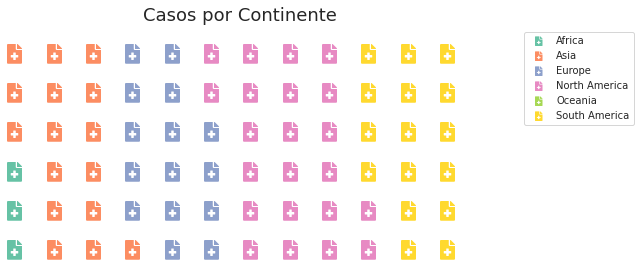

In [13]:
waf = covid.query('date == "2020-07-08"')
waf = waf.groupby('continent')['total_cases'].sum().to_dict()

fig = plt.figure(
    FigureClass = Waffle,
    rows = 6,
    columns = 12,
    values = waf,
    icons = 'file-medical', icon_size=20, #file-medical
    #colors = ('gray','darkgray','lightgrey','dimgrey','gainsboro','whitesmoke'),
    figsize = (9,12),
    legend = {'loc': 'upper left','bbox_to_anchor':(1.1,1) },
    title ={'label': 'Casos por Continente','fontsize': 18, 'fontweight': 'medium' , 'loc': 'center'},
    icon_legend = True, 
    rounding_rule = 'nearest'
)

plt.tight_layout()

## Cenário Brasil

Atualmente, o Brasil é o segundo pais com o maior número de infectados e de mortes por coronavírus, ficando atrás apenas do Estados Unidos. 

Para avaliarmos mais de perto o cenário no Brasil, utilizaremos das informações oficiais disponibilizadas pelo [Ministério da Saúde](https://covid.saude.gov.br/), dados no nível municipal do [Brasil.IO](https://brasil.io/dataset/covid19/caso) e dados mais recentes reportados pela equipe do [@CoronavirusBra1](https://twitter.com/CoronavirusBra1) e consolidades pela equipe [SciELO](10.1590/SciELOPreprints.362).

Os dados sobre o número de recuperados, suspeitos e testes por estado foram obtidos a partir da [planilha](https://docs.google.com/spreadsheets/d/1MWQE3s4ef6dxJosyqvsFaV4fDyElxnBUB6gMGvs3rEc/edit?usp=sharing) atualizada pelo [@CoronavirusBra1](https://twitter.com/CoronavirusBra1) usando os boletins de cada estado, quando disponíveis.

In [ ]:
#montar um repositório do google drive para leitura e montagem do dataframe
from google.colab import drive
drive.mount('/content/drive')

In [39]:
brasil = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Covid19/HIST_PAINEL_COVIDBR_09jul2020.xlsx')
brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


Após verificar as 5 primeiras entradas do nosso dataframe, abaixo criaremos um outro dataframe tratando os dados que estão em branco e pegando as informações que iremos trabalhar para apresentar um gráfico onde iremos analisar a quantidade de casos, mortes e recuperados.

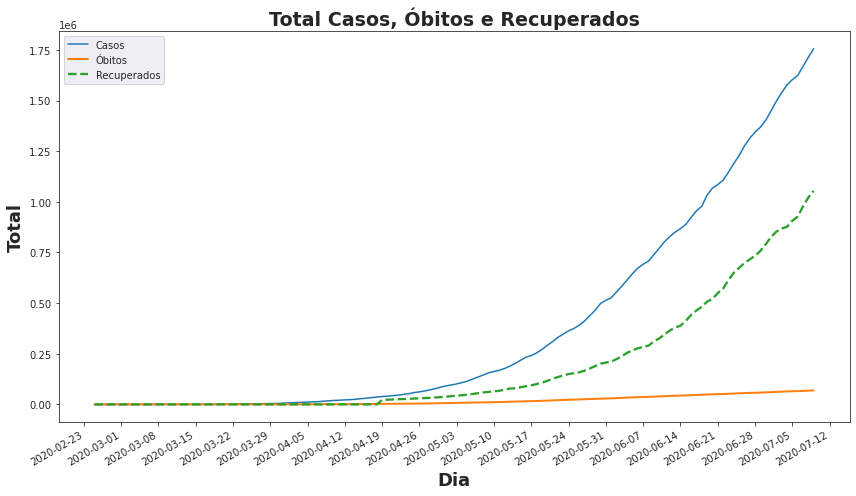

In [16]:
from matplotlib.ticker import MultipleLocator #Importar a função para alteração dos valores dos axis

geral = brasil.loc[(brasil.regiao == "Brasil"),
                   ['regiao', 'data', 'semanaEpi', 'casosAcumulado','obitosAcumulado', 'Recuperadosnovos' ]
                  ].fillna(0)
                  
fig, ax = plt.subplots(figsize=(12,7))
sns.set_style("dark")
ax.plot(geral.data, geral.casosAcumulado, linewidth = 1.5, label="Casos")
ax.plot(geral.data, geral.obitosAcumulado, linewidth = 2, label='Óbitos')
ax.plot(geral.data, geral.Recuperadosnovos, linewidth = 2.3, label='Recuperados', ls="--")
plt.grid(False)
plt.title('Total Casos, Óbitos e Recuperados', fontsize='19', fontweight ='bold')
plt.ylabel('Total', fontsize='18', fontweight ='bold')
plt.xlabel('Dia', fontsize='18', fontweight ='bold')
ax.xaxis.set_major_locator(MultipleLocator(7)) # colocando o valor do eixo x por semana utilizando as funções importadas
fig.autofmt_xdate()
plt.legend(frameon=True)
plt.tight_layout()

### Quais os 10 estados com o maior número de casos? 


In [18]:
estado_casos = brasil[{'estado', 'municipio', 'codmun', 'casosAcumulado', 'obitosAcumulado' ,'data' }].fillna(9999)
estado_casos = estado_casos.loc[(estado_casos.municipio == 9999) & (estado_casos.data == "2020-07-09") & (estado_casos.codmun == 9999) & (estado_casos.estado != 9999)]
estado_casos = estado_casos[{'estado', 'casosAcumulado'}].sort_values(by="casosAcumulado", ascending=False)[0:11]
estado_casos = estado_casos.reset_index(drop=True)
estado_casos = estado_casos.shift()[1:]
estado_casos = estado_casos.rename(columns= {'estado':'Estado', 'casosAcumulado': 'Total de Casos'})
estado_casos = round(estado_casos,8)
estado_casos

,Total de Casos,Estado
1,349715.0,SP
2,131000.0,CE
3,128324.0,RJ
4,120731.0,PA
5,98319.0,BA
6,95323.0,MA
7,81318.0,AM
8,68767.0,PE
9,66864.0,MG
10,65677.0,DF


### Quais os 10 estados com o maior número de óbitos?

In [19]:
estado_obt = brasil[{'estado', 'municipio', 'codmun', 'casosAcumulado', 'obitosAcumulado' ,'data' }].fillna(9999)
estado_obt = estado_obt.loc[(estado_obt.municipio == 9999) & (estado_obt.data == "2020-07-09") & (estado_obt.codmun == 9999) & (estado_obt.estado != 9999)]
estado_obt = estado_obt[{'estado', 'obitosAcumulado'}].sort_values(by="obitosAcumulado", ascending=False)[0:11]
estado_obt = estado_obt.reset_index(drop=True)
estado_obt = estado_obt.shift()[1:]
estado_obt = estado_obt.rename(columns= {'estado':'Estado', 'obitosAcumulado': 'Total de Óbitos'})
estado_obt = round(estado_obt,8)
estado_obt

,Total de Óbitos,Estado
1,17118.0,SP
2,11115.0,RJ
3,6741.0,CE
4,5409.0,PE
5,5196.0,PA
6,2985.0,AM
7,2357.0,MA
8,2328.0,BA
9,1930.0,ES
10,1445.0,MG


### Mapa de Calor 

Abaixo, iremos plotar um gráfico de calor onde será perceptível a distribuição do contágio em todo o território brasileiro.  

In [32]:
#Importando o dataframe para plotagem
cidades = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-gps.csv')
 
cidades.head()

,type,name,lat,lon,total,total_per_100k_inhabitants
0,1,Abadia de Goiás/GO,-16.757264,-49.441221,84,957.48319
1,1,Abadia dos Dourados/MG,-18.491119,-47.406359,5,71.54099
2,1,Abadiânia/GO,-16.194095,-48.706777,65,324.31893
3,D1,Abadiânia/GO,-16.194095,-48.706777,3,14.96857
4,1,Abaetetuba/PA,-1.721828,-48.878843,2390,1515.55505


In [33]:
#importando as bibliotecas necessárias para plotar uma mapa de calor
import folium
from folium import plugins

In [34]:
# tratando as cordenadas para usar no gráfico
cidades = cidades.query('type == "1"').copy()
coordernadas = cidades [ [ 'lat', 'lon', 'total' ] ]
coordernadas = coordernadas.dropna()
coordernadas = coordernadas.values.tolist() # passando os valores como uma lista para aceitar no folium

In [ ]:
# chamando o mapa do brasil usando as coordenadas 
brasil_map = folium.Map(
                  width="100%",
                  height="100%",
                  location=[-15.788497, -47.879873],
                  zoom_start=4.2
)
 
#criando o heatmap em cima do mapa padrão criado, acima. 
 
brasil_map = brasil_map.add_child(plugins.HeatMap(coordernadas))
 
for i in range(0, len(cidades)): # cursor para atribiur no mapa um círculo com as informações de casos por cidade. 
  folium.Circle(
      location = [ cidades.iloc[i]['lat'], cidades.iloc[i]['lon'] ],
      color ='#00FF69',
      fill ='#00A1B3',
      tooltip ='<li><bold> Cidade: ' + str(cidades.iloc[i]['name'].encode('raw_unicode_escape')) +
               '<li><bold> Casos Confirmados: ' + str(cidades.iloc[i]['total']),
      radius = 1000.1          
      
 
 
  ).add_to(brasil_map) # adicionando as informações criadas em cima do mapa do brasil.
 
brasil_map # plotando o mapa

## Conclusão

O mundo está passando por um momento muito complicado e os **impactos** dessa pandimia são **assustadores** em todos os aspéctos. Neste estudo, foram abordados de forma resumida o cenário no Brasil e no Mundo. 

Como ainda estamos vivendo esse momento, estes dados ficarão rapidamente obsoletos e não vão refletir a realidade no momento da leitura. 

Todos os dados explorados aqui tem como referência o dia **09/07/2020**. 